# Cloth Price Dataset

In [1]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# supress warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

#### Read & Explore dataset

In [3]:
df = pd.read_csv('C:/Users/ashit/Downloads/ML/cloths.csv')
df.head()

,RATE,GROSS AMT,PCS,Style,Discount/Charges
0,616.56,617.0,1,MEN5004,0.071313
1,616.56,617.0,1,MEN5004,0.071313
2,616.56,617.0,1,MEN5004,0.071313
3,616.56,617.0,1,MEN5009,0.071313
4,616.56,617.0,1,MEN5011,0.071313


#### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36391 entries, 0 to 36390
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RATE              36391 non-null  float64
 1   GROSS AMT         36391 non-null  float64
 2   PCS               36391 non-null  int64  
 3   Style             36391 non-null  object 
 4   Discount/Charges  36391 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.4+ MB


In [5]:
df.duplicated().sum()

24170

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12221 entries, 0 to 36390
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RATE              12221 non-null  float64
 1   GROSS AMT         12221 non-null  float64
 2   PCS               12221 non-null  int64  
 3   Style             12221 non-null  object 
 4   Discount/Charges  12221 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 572.9+ KB


In [8]:
df.Style.nunique()

1064

In [9]:
top30 = df.Style.value_counts(ascending = False)[:30]

#### Visualization

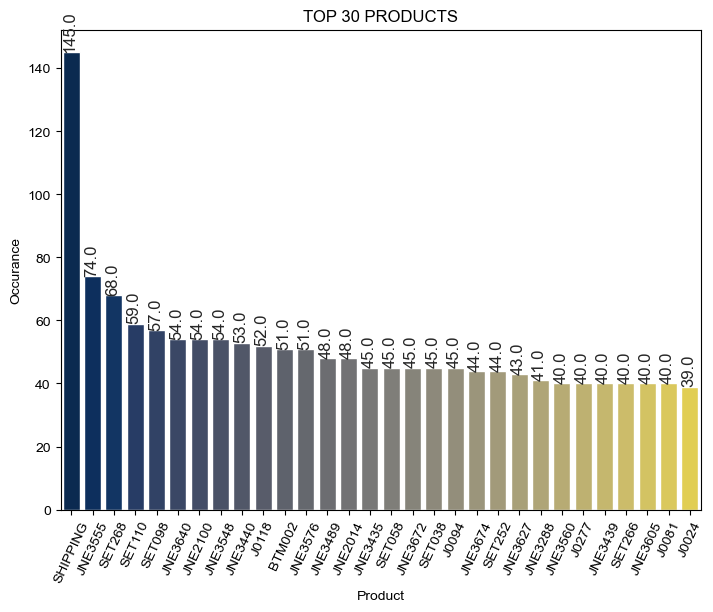

In [10]:
fig = plt.figure()
axis = fig.add_axes([1,1,1,1])
sns.set()
sns.barplot(x = top30.index, y = top30, palette='cividis', ax = axis )
plt.xticks(rotation = 65)
plt.title('TOP 30 PRODUCTS')
plt.xlabel('Product')
plt.ylabel('Occurance')
for i in axis.patches:
    axis.text(i.get_x(), i.get_height(), i.get_height(), rotation=90, va='bottom')


### Costliest products in each style(Top 30 Styles)

Text(0.5, 1.0, 'Costliest products in each style(Top 30 Styles)')

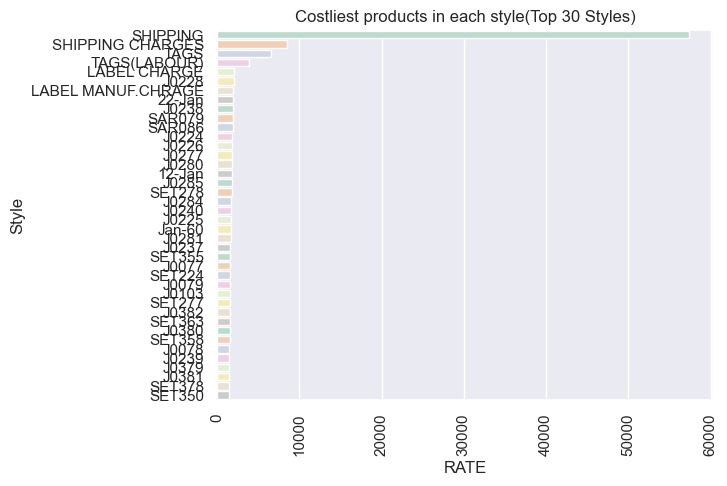

In [11]:
val = df.groupby('Style')['RATE'].max().sort_values(ascending = False)
val = val.head(40)
sns.barplot(x = val, y = val.index, palette = 'Pastel2')
plt.xticks(rotation = 90)
plt.title('Costliest products in each style(Top 30 Styles)')

Text(0.5, 1.0, 'Top 100 Popular Styles')

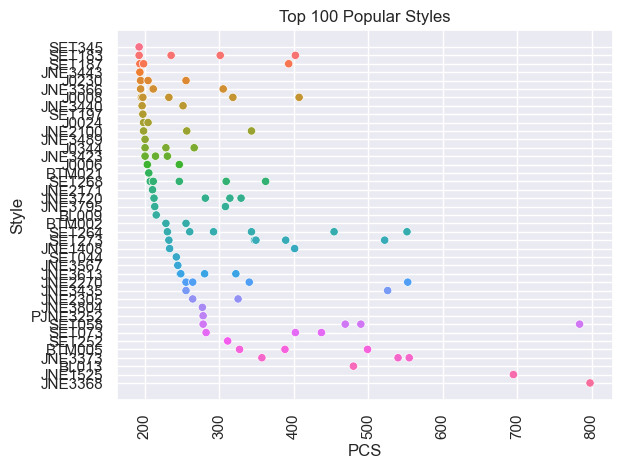

In [12]:
val1 = df[['PCS', 'Style']].sort_values(by = 'PCS', ascending = False).drop_duplicates().query('PCS != 0').head(100).sort_values(by = 'PCS')
sns.scatterplot(data = val1, x = 'PCS', y = 'Style',hue ='Style', legend = False )
plt.xticks(rotation = 90)
plt.title('Top 100 Popular Styles')

Text(0.5, 1.0, 'Top 100 Discounted Styles')

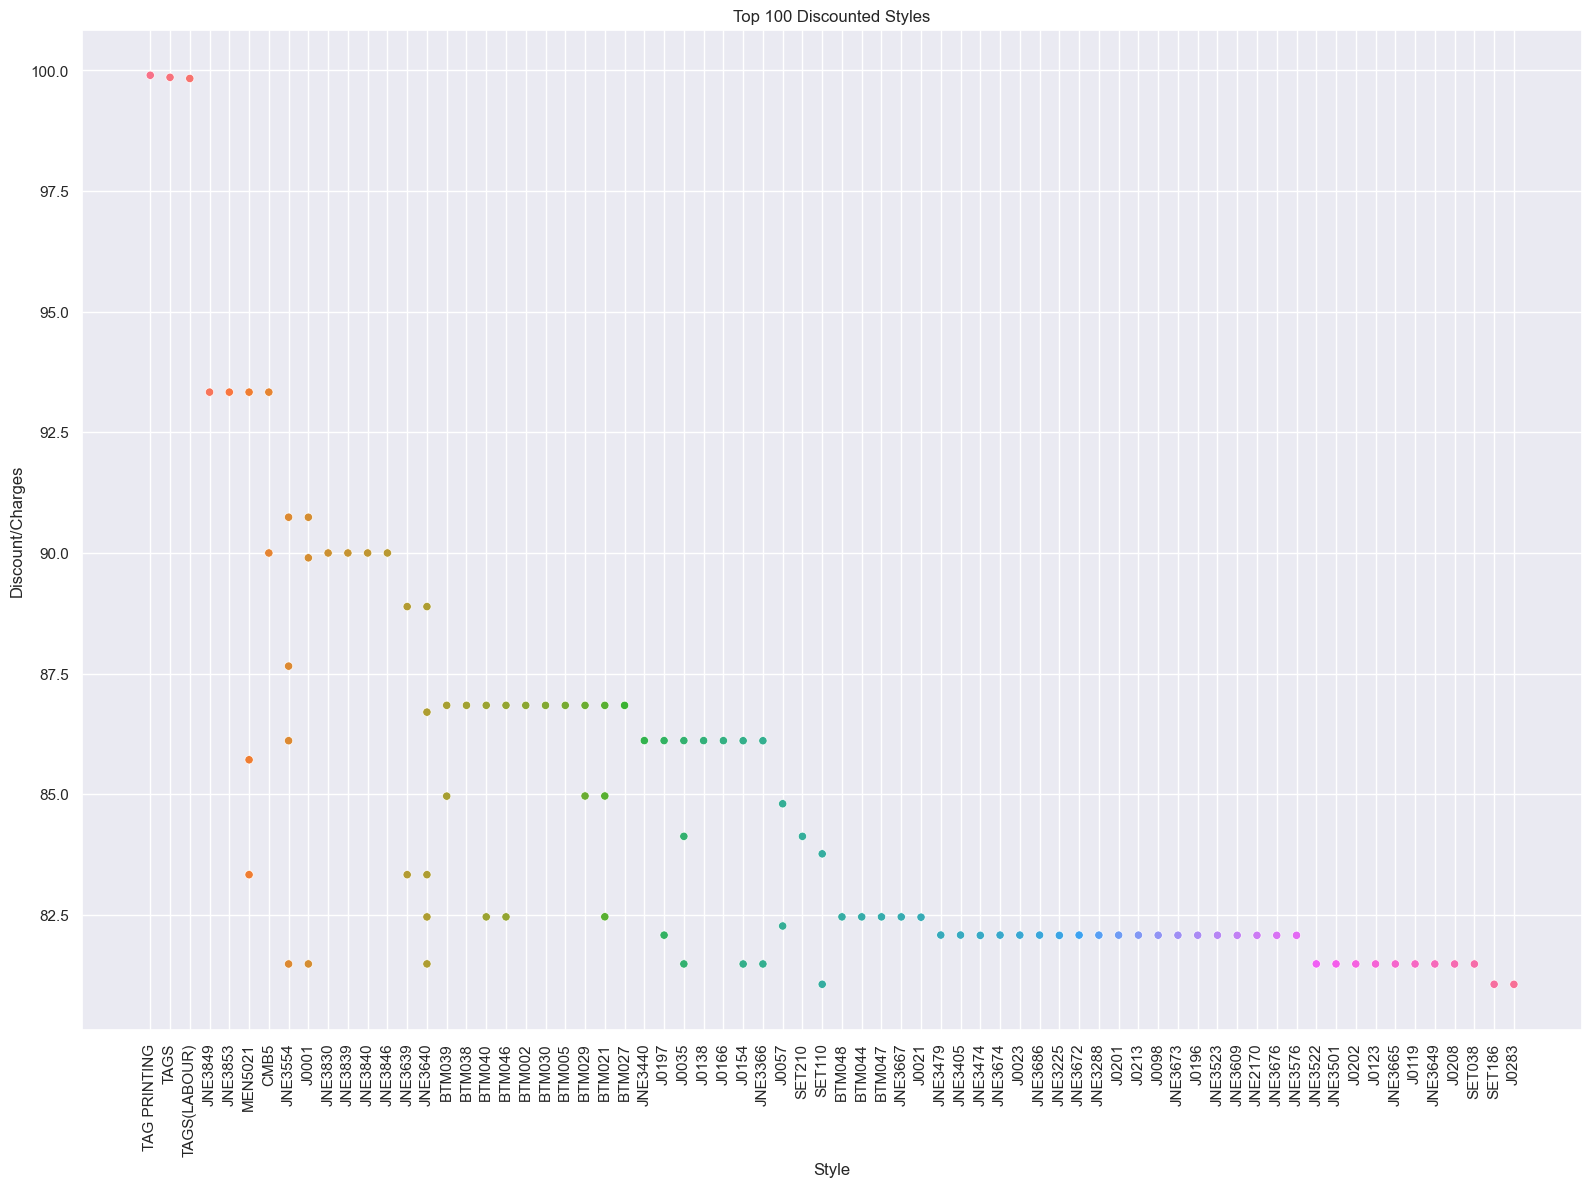

In [13]:
val2 = df[['Discount/Charges', 'Style']].sort_values(by ='Discount/Charges', ascending = False).drop_duplicates().head(100)
fig3 = plt.figure(figsize = (15,10))
axis = fig3.add_axes([1,1,1,1])
sns.scatterplot(data = val2, x = 'Style', y = 'Discount/Charges', hue = 'Style', legend = False)
plt.xticks(rotation = 90)
plt.title('Top 100 Discounted Styles')

In [15]:
gpdata = df[['PCS', 'Style']].groupby('PCS')

In [16]:
dtgp = gpdata.groups

In [18]:
list1 = []
for i, j in dtgp.items():
    list1.append((i, len(j)))

In [19]:
newdf = sorted(list1, key = lambda X:X[0], reverse = True) [:40]

In [23]:
lqproduct = []
for i in newdf:
    data = df.query('PCS==%d' %(i[0]))
    lqproduct.append((data.Style.drop_duplicates(),i[0]))

In [25]:
style, count = [],[]
for i in range(len(lqproduct)):
    style.append(lqproduct[i][0].values[0])
    count.append(lqproduct[i][1])

### Product bought with huge quantity

Text(0, 0.5, 'Purchase Count')

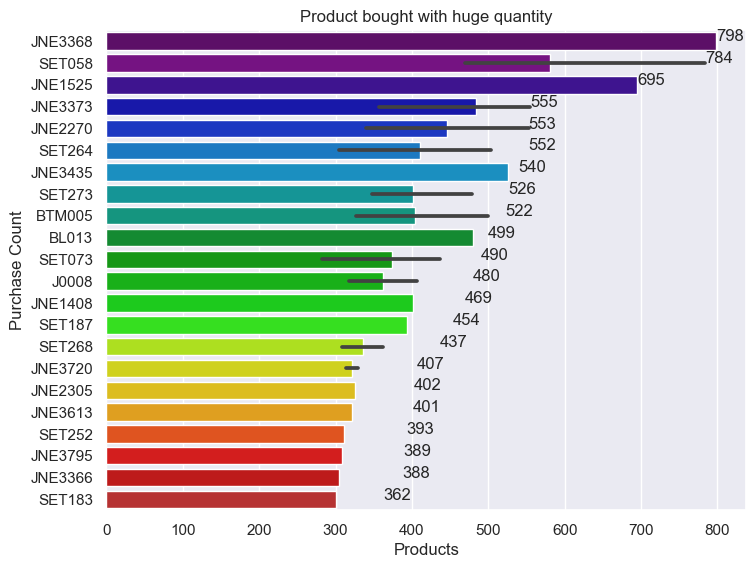

In [29]:
fig = plt.figure()
axis = fig.add_axes([1,1,1,1])
sns.barplot(x = count, y = style, ax = axis, palette = 'nipy_spectral')
for i in range(len(style)):
    axis.annotate(count[i],(count[i],i))
plt.title('Product bought with huge quantity')
plt.xlabel('Products')
plt.ylabel('Purchase Count')

### Discounted Percentage Pie Chart

Text(0.5, 1.0, 'Discounted Percentage Pie Chart')

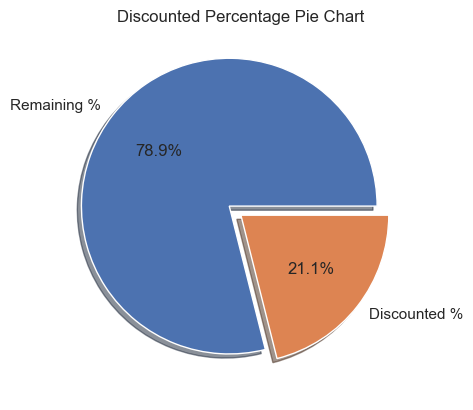

In [30]:
plt.pie([(9330355.09/11821711.69)*100,100-(9330355.09/11821711.69)*100],labels=['Remaining %','Discounted %'],autopct="%1.1f%%",shadow=True,explode=(0.1,0))
plt.title('Discounted Percentage Pie Chart')

In [31]:
newdata=df.sort_values(by='RATE',ascending=False)

In [32]:
newdata.describe()

,RATE,GROSS AMT,PCS,Discount/Charges
count,12221.000000,12221.000000,12221.000000,12221.000000
mean,763.469036,967.327689,28.051060,8.940016
std,1068.206562,1233.881287,57.477774,24.337188
min,2.000000,100.000000,0.000000,-13.676149
25%,462.500000,487.000000,1.000000,-3.021978
50%,598.750000,681.000000,5.000000,0.000000
75%,850.000000,1039.000000,32.000000,0.026483
max,57400.000000,57400.000000,798.000000,99.900000


In [33]:
values=[0,100,500,1000,2000,3000,6000,10000,30000,50000,100000]
bins=pd.cut(newdata.RATE,values)

In [34]:
newdata['RATE Interval']=bins
data1=newdata['RATE Interval'].value_counts()
data1

(500, 1000]        6335
(100, 500]         4113
(1000, 2000]       1624
(3000, 6000]         60
(6000, 10000]        33
(2000, 3000]         30
(10000, 30000]       20
(0, 100]              4
(30000, 50000]        1
(50000, 100000]       1
Name: RATE Interval, dtype: int64

### Swarm Plot

Text(0.5, 1.0, 'Swarm Plot For Price Distribution')

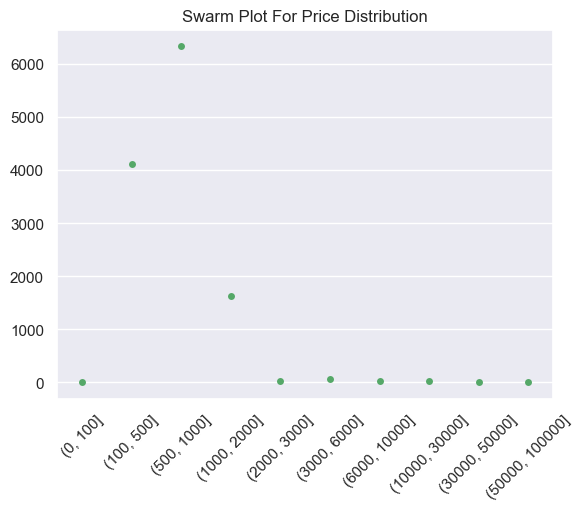

In [36]:
# Swarm plot
sns.swarmplot(x=data1.index, y=data1.values,color='g')

plt.xticks(rotation=45)
plt.title('Swarm Plot For Price Distribution')

### Distributions of different features

In [37]:
from matplotlib import cm
c3=cm.get_cmap('plasma')

In [38]:
col=data.columns
colr=[c3(0.0),c3(0.3),c3(0.6),c3(0.9),c3(0.7)]

(0.0, 5000.0)

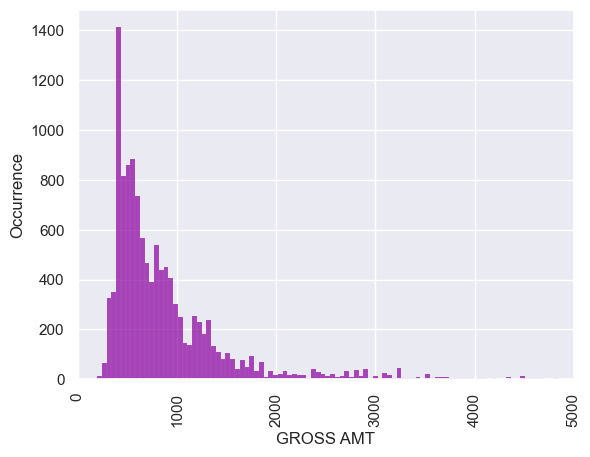

In [40]:
sns.histplot(x=df[col[1]],color=colr[1])
     
plt.xticks(rotation=90)
plt.ylabel('Occurrence')

plt.xlim(0,5000)

(0.0, 3000.0)

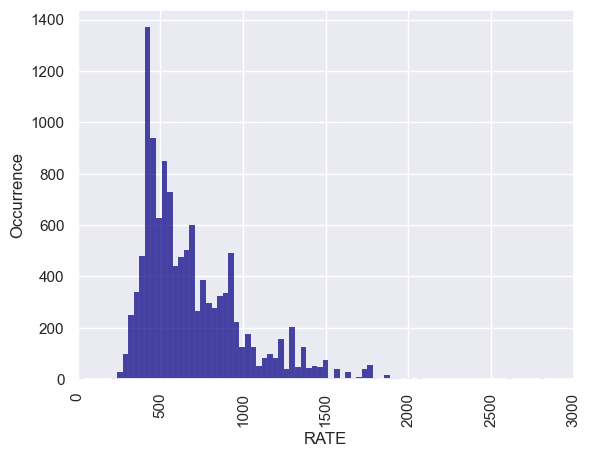

In [41]:
sns.histplot(x=df[col[0]],color=colr[0])
     
plt.xticks(rotation=90)
plt.ylabel('Occurrence')
plt.xlim(0,3000)

(0.0, 150.0)

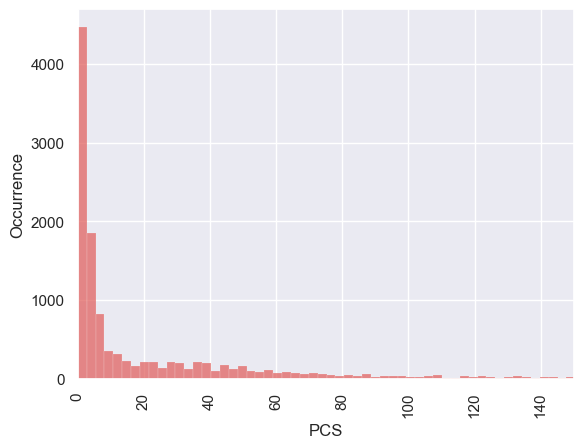

In [42]:
sns.histplot(x=df[col[2]],color=colr[2])
     
plt.xticks(rotation=90)
plt.ylabel('Occurrence')
plt.xlim(0,150)

Text(0, 0.5, 'Occurrence')

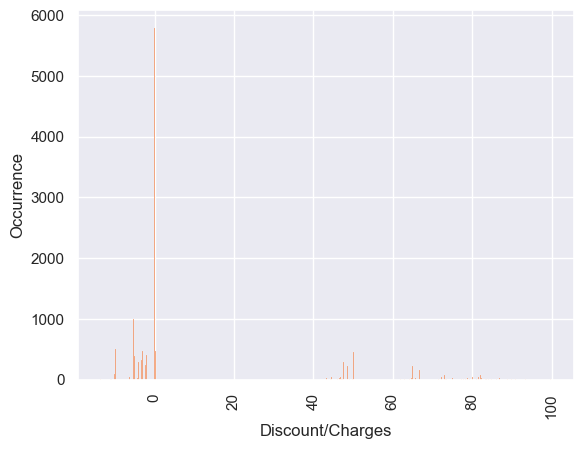

In [43]:
sns.histplot(x=df[col[4]],color=colr[4])
     
plt.xticks(rotation=90)
plt.ylabel('Occurrence')